In [23]:
import pandas as pd

# Load the dataset, assuming 'dataset.csv' is the name of your file
df = pd.read_csv('dataset.csv', nrows=1000, usecols=['id', 'V1', 'V2', 'V3', 'V4'])

# Display the first few rows of the DataFrame to verify the subset
print(df.head())


   id        V1        V2        V3        V4
0   0 -0.260648 -0.469648  2.496266 -0.083724
1   1  0.985100 -0.356045  0.558056 -0.429654
2   2 -0.260272 -0.949385  1.728538 -0.457986
3   3 -0.152152 -0.508959  1.746840 -1.090178
4   4 -0.206820 -0.165280  1.527053 -0.448293


C:\Users\Shantanu\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


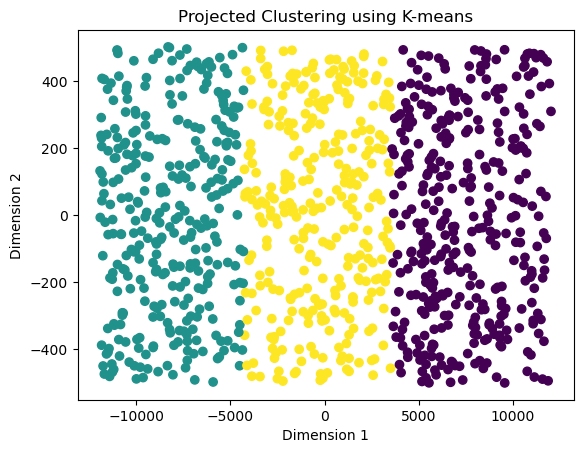

In [19]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import squareform
import matplotlib.pyplot as plt

# Load your dataset, assuming 'df' is your DataFrame with columns V1 to V28
df = pd.read_csv('dataset.csv',nrows=1000)

# Apply PCA for dimensionality reduction to 2 dimensions
num_selected_dimensions = 2
pca = PCA(n_components=num_selected_dimensions)
projected_data = pca.fit_transform(df)

# Perform k-means clustering on the projected data
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=0)
kmeans.fit(projected_data)
cluster_labels = kmeans.labels_

# Plot the clusters
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=cluster_labels)
plt.title("Projected Clustering using K-means")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.show()




In [22]:
db_index_value = davies_bouldin_score(projected_data, cluster_labels)
print("DB Index:", db_index_value)

DB Index: 0.5068862243542592


In [28]:
dunn_index_value = calculate_dunn_index(projected_data, cluster_labels)

print("Dunn Index:", dunn_index_value)

def calculate_dunn_index(X, labels):
    # Calculate maximum intra-cluster distance
    max_intra_distance = 0
    for label in set(labels):
        cluster_points = X[labels == label]
        cluster_distances = pairwise_distances(cluster_points, metric='euclidean')
        max_cluster_distance = cluster_distances.max()
        if max_cluster_distance > max_intra_distance:
            max_intra_distance = max_cluster_distance

    # Calculate minimum inter-cluster distance
    inter_cluster_distances = pairwise_distances(X, metric='euclidean')[labels[:, None] != labels]
    min_inter_distance = inter_cluster_distances.min()

    # Calculate Dunn Index
    dunn_index = min_inter_distance / max_intra_distance

    return dunn_index

Dunn Index: 0.01515274615271992
